In [1]:
import numpy as np
import torch
import math
import matplotlib.pyplot as plt 
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import os
from scipy.signal import savgol_filter
import seaborn as sns

In [2]:
dir_breakout_BPPO = os.listdir('./runs_breakout_10/Training/BPPO')
dir_breakout_PPO = os.listdir('./runs_breakout_10/Training/PPO')
print(dir_breakout_BPPO)
print(dir_breakout_PPO)

['Breakout-v5__beta_ppo_atari_envpool__1680116335', 'Breakout-v5__beta_ppo_atari_envpool__1680116496', 'Breakout-v5__beta_ppo_atari_envpool__1680136217', 'Breakout-v5__beta_ppo_atari_envpool__1680136221', 'Breakout-v5__beta_ppo_atari_envpool__1680145645', 'Breakout-v5__beta_ppo_atari_envpool__1680145647', 'Breakout-v5__beta_ppo_atari_envpool__1680145657', 'Breakout-v5__beta_ppo_atari_envpool__1680191927', 'Breakout-v5__beta_ppo_atari_envpool__1680191929', 'Breakout-v5__beta_ppo_atari_envpool__1681176105']
['Breakout-v5__ppo_atari_envpool__1680192506', 'Breakout-v5__ppo_atari_envpool__1680199067', 'Breakout-v5__ppo_atari_envpool__1680217644', 'Breakout-v5__ppo_atari_envpool__1680217651', 'Breakout-v5__ppo_atari_envpool__1680217672', 'Breakout-v5__ppo_atari_envpool__1680240318', 'Breakout-v5__ppo_atari_envpool__1680240350', 'Breakout-v5__ppo_atari_envpool__1680274728', 'Breakout-v5__ppo_atari_envpool__1680274729', 'Breakout-v5__ppo_atari_envpool__1680274739']


dir_list = os.listdir('./runs_breakout_10/BPPO')
BPPO_10 = []
for i in range(len(dir_list)):
    #GET DATA AND PARSE
    event_acc = EventAccumulator(str_name + '/' + dir_list[i])
    event_acc.Reload()

    # Get the scalar data (such as loss and accuracy) from the event file
    tags = event_acc.Tags()['scalars']
    scalar_data = {}
    print(dir_list[i])
    #Average Return 
    events = event_acc.Scalars('charts/avg_episodic_return')
    scalar_data['charts/avg_episodic_return'] = [(event.step, event.value) for event in events]

    #Return 
    events = event_acc.Scalars('charts/episodic_return')
    scalar_data['charts/episodic_return'] = [(event.step, event.value) for event in events]


    BPPO_10.append(scalar_data)

my_dict = {}

for item in BPPO_10[0]['charts/avg_episodic_return']:
    x, y = item
    if x not in my_dict:
        my_dict[x] = item
    else:
        existing_item = my_dict[x]
        if y > existing_item[1]:
            my_dict[x] = item

my_set = set(my_dict.values())

In [3]:
def var_and_avg_plot(str_name):
    dir_list = os.listdir(str_name)
    BPPO_10 = []
    for i in range(len(dir_list)):
        #GET DATA AND PARSE
        event_acc = EventAccumulator(str_name + '/' + dir_list[i])
        event_acc.Reload()

        # Get the scalar data (such as loss and accuracy) from the event file
        tags = event_acc.Tags()['scalars']
        scalar_data = {}
        print(dir_list[i])
        #Average Return 
        events = event_acc.Scalars('charts/avg_episodic_return')
        scalar_data['charts/avg_episodic_return'] = [(event.step, event.value) for event in events]

        #Return 
        events = event_acc.Scalars('charts/episodic_return')
        scalar_data['charts/episodic_return'] = [(event.step, event.value) for event in events]

        
        
        BPPO_10.append(scalar_data)
        
    
    
    # PUT X AND Y AXIS
    x_axis_BPPO = np.array([[x[0] for x in y['charts/episodic_return'] ]for y in BPPO_10])
    y_axis_BPPO = np.array([[x[1] for x in y['charts/episodic_return'] ]for y in BPPO_10])
        
    # GET COLUMN AVERAGE VARIANCE AND AVERAGE
    x_axis_avg = []
    y_axis_BPPO_avg = []
    y_axis_BPPO_var = []
    
    for i in range(len(y_axis_BPPO)):
        print(len(y_axis_BPPO[i]))
        
    for i in range(len(y_axis_BPPO[0])):
        y_col = y_axis_BPPO[:, i]
        x_col = x_axis_BPPO[:, i]
        x_axis_avg.append(np.average(x_col))
        y_axis_BPPO_avg.append(np.average(y_col))
        y_axis_BPPO_var.append(np.var(y_col))
    
    #return x_axis_avg, savgol_filter(y_axis_BPPO_avg, 51, 3), savgol_filter(y_axis_BPPO_var, 51, 3)
    return x_axis_avg, y_axis_BPPO_avg,  savgol_filter(y_axis_BPPO_avg, 51, 3), y_axis_BPPO_var ,savgol_filter(y_axis_BPPO_var, 51, 3)

In [4]:
def test_average_10_runs(str_name):
    dir_list = os.listdir(str_name)
    BPPO_10 = []
    for i in range(len(dir_list)):
        #GET DATA AND PARSE
        event_acc = EventAccumulator(str_name + '/' + dir_list[i])
        event_acc.Reload()

        # Get the scalar data (such as loss and accuracy) from the event file
        tags = event_acc.Tags()['scalars']
        scalar_data = {}
        print(dir_list[i])
        #Average Return 
        events = event_acc.Scalars('charts/avg_episodic_return')
        scalar_data['charts/avg_episodic_return'] = [(event.step, event.value) for event in events]

        #Return 
        events = event_acc.Scalars('charts/episodic_return')
        scalar_data['charts/episodic_return'] = [(event.step, event.value) for event in events]


        BPPO_10.append(scalar_data)
        
    
    
    # PUT X AND Y AXIS
    x_axis_BPPO = np.array([[x[0] for x in y['charts/episodic_return'] ]for y in BPPO_10])
    y_axis_BPPO = np.array([[x[1] for x in y['charts/episodic_return'] ]for y in BPPO_10])
    
    std = np.std(y_axis_BPPO)
    error = np.std(y_axis_BPPO)/np.sqrt(len(y_axis_BPPO))
    return np.average(y_axis_BPPO), error
    #return x_axis_avg, y_axis_BPPO_avg, y_axis_BPPO_var

In [5]:
def x_and_y_plot(str_dic):
    # PUT X AND Y AXIS
    x_axis_BPPO = np.array([[x[0] for x in y[str_dic] ]for y in BPPO_10])
    y_axis_BPPO = np.array([[x[1] for x in y[str_dic] ]for y in BPPO_10])
        
        
        
    # GET COLUMN AVERAGE VARIANCE AND AVERAGE
    x_axis_avg = []
    y_axis_BPPO_avg = []
    y_axis_BPPO_var = []

    for i in range(len(y_axis_BPPO[0])):
        y_col = y_axis_BPPO[:, i]
        x_col = x_axis_BPPO[:, i]
        x_axis_avg.append(np.average(x_col))
        y_axis_BPPO_avg.append(np.average(y_col))
        y_axis_BPPO_var.append(np.var(y_col))
        
    
    #return x_axis_avg, savgol_filter(y_axis_BPPO_avg, 51, 3), savgol_filter(y_axis_BPPO_var, 51, 3)
    return x_axis_avg, savgol_filter(y_axis_BPPO_avg, 51, 3), savgol_filter(y_axis_BPPO_var, 51, 3)

In [6]:
BPPO_x_axis_avg, BPPO_y_axis_BPPO_avg, BPPO_y_axis_smoothed, BPPO_y_axis_BPPO_var, BPPO_y_axis_BPPO_var_smoothed = var_and_avg_plot('./runs_breakout_10/Training/BPPO')

Breakout-v5__beta_ppo_atari_envpool__1680116335
Breakout-v5__beta_ppo_atari_envpool__1680116496
Breakout-v5__beta_ppo_atari_envpool__1680136217
Breakout-v5__beta_ppo_atari_envpool__1680136221
Breakout-v5__beta_ppo_atari_envpool__1680145645
Breakout-v5__beta_ppo_atari_envpool__1680145647
Breakout-v5__beta_ppo_atari_envpool__1680145657
Breakout-v5__beta_ppo_atari_envpool__1680191927
Breakout-v5__beta_ppo_atari_envpool__1680191929
Breakout-v5__beta_ppo_atari_envpool__1681176105
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000


In [7]:
PPO_x_axis_avg, PPO_y_axis_PPO_avg, PPO_y_axis_smoothed, PPO_y_axis_PPO_var, PPO_y_axis_PPO_var_smoothed = var_and_avg_plot('./runs_breakout_10/Training/PPO')

Breakout-v5__ppo_atari_envpool__1680192506
Breakout-v5__ppo_atari_envpool__1680199067
Breakout-v5__ppo_atari_envpool__1680217644
Breakout-v5__ppo_atari_envpool__1680217651
Breakout-v5__ppo_atari_envpool__1680217672
Breakout-v5__ppo_atari_envpool__1680240318
Breakout-v5__ppo_atari_envpool__1680240350
Breakout-v5__ppo_atari_envpool__1680274728
Breakout-v5__ppo_atari_envpool__1680274729
Breakout-v5__ppo_atari_envpool__1680274739
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000


In [8]:
sns.set_style("darkgrid")

# ATARI COMPARISION (BPPO VS PPO)

## Breakout

### Average Return

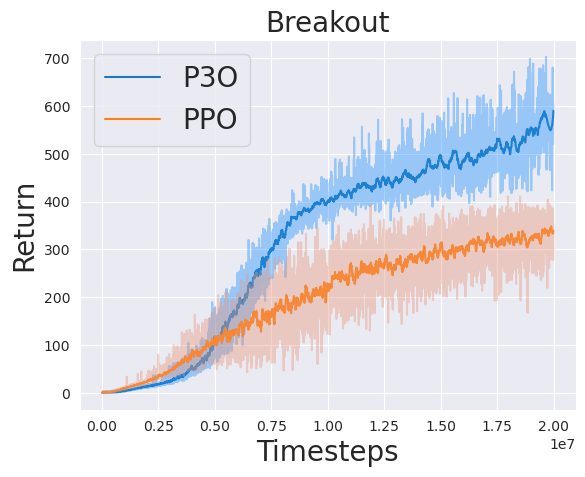

In [9]:
plt.plot(BPPO_x_axis_avg,BPPO_y_axis_smoothed, label="P3O")
plt.plot(BPPO_x_axis_avg, BPPO_y_axis_BPPO_avg, color="dodgerblue", alpha=0.4)
plt.plot(PPO_x_axis_avg, PPO_y_axis_smoothed, label="PPO")
plt.plot(PPO_x_axis_avg, PPO_y_axis_PPO_avg,  color="darksalmon", alpha=0.4)
plt.xlabel('Timesteps', size=20)
plt.ylabel('Return', size=20)
plt.legend(prop={'size':20})
plt.title("Breakout", size=20)
plt.savefig('Breakout_Return')
plt.show()

### Variance

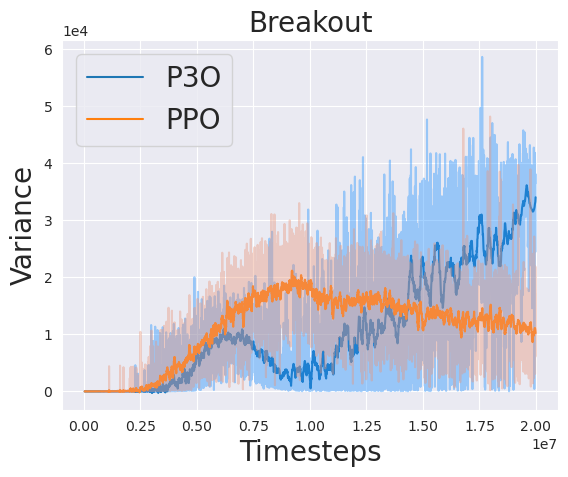

In [10]:
plt.plot(BPPO_x_axis_avg, BPPO_y_axis_BPPO_var_smoothed,label="P3O")
plt.plot(BPPO_x_axis_avg, BPPO_y_axis_BPPO_var, color="dodgerblue", alpha=0.4)
plt.plot(PPO_x_axis_avg, PPO_y_axis_PPO_var_smoothed,label="PPO")
plt.plot(PPO_x_axis_avg, PPO_y_axis_PPO_var,  color="darksalmon", alpha=0.4)
plt.xlabel('Timesteps', size=20)
plt.ylabel('Variance', size=20)
plt.legend(prop={'size':20})
plt.title("Breakout", size=20)
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))
plt.savefig('Breakout_Variance')
plt.show()

## Qbert

In [11]:
BPPO_x_axis_avg, BPPO_y_axis_BPPO_avg, BPPO_y_axis_smoothed, BPPO_y_axis_BPPO_var, BPPO_y_axis_BPPO_var_smoothed = var_and_avg_plot('./runs_qbert_10/Training/BPPO')

Qbert-v5__beta_ppo_atari_envpool__1680367087
Qbert-v5__beta_ppo_atari_envpool__1680367094
Qbert-v5__beta_ppo_atari_envpool__1680367109
Qbert-v5__beta_ppo_atari_envpool__1680377062
Qbert-v5__beta_ppo_atari_envpool__1680377064
Qbert-v5__beta_ppo_atari_envpool__1680386575
Qbert-v5__beta_ppo_atari_envpool__1680386577
Qbert-v5__beta_ppo_atari_envpool__1680399677
Qbert-v5__beta_ppo_atari_envpool__1680399678
Qbert-v5__beta_ppo_atari_envpool__1680449024
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000


In [12]:
PPO_x_axis_avg, PPO_y_axis_PPO_avg, PPO_y_axis_smoothed, PPO_y_axis_PPO_var, PPO_y_axis_PPO_var_smoothed = var_and_avg_plot('./runs_qbert_10/Training/PPO')

Qbert-v5__ppo_atari_envpool__1680400756
Qbert-v5__ppo_atari_envpool__1680400758
Qbert-v5__ppo_atari_envpool__1680448919
Qbert-v5__ppo_atari_envpool__1680448925
Qbert-v5__ppo_atari_envpool__1680460744
Qbert-v5__ppo_atari_envpool__1680460748
Qbert-v5__ppo_atari_envpool__1680477649
Qbert-v5__ppo_atari_envpool__1680477650
Qbert-v5__ppo_atari_envpool__1680493395
Qbert-v5__ppo_atari_envpool__1680493397
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000


### Average Return

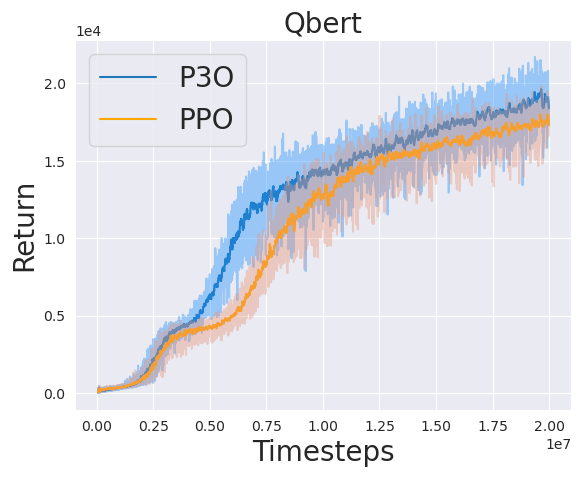

In [13]:
plt.plot(BPPO_x_axis_avg,BPPO_y_axis_smoothed, label="P3O")
plt.plot(BPPO_x_axis_avg, BPPO_y_axis_BPPO_avg, color="dodgerblue", alpha=0.4)
plt.plot(PPO_x_axis_avg, PPO_y_axis_smoothed, label="PPO", color="orange")
plt.plot(PPO_x_axis_avg, PPO_y_axis_PPO_avg,  color="darksalmon", alpha=0.4)
plt.xlabel('Timesteps', size=20)
plt.ylabel('Return', size=20)
plt.legend(prop={'size':20})
plt.title("Qbert", size=20)
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))
plt.savefig('Qbert_Return')
plt.show()

### Variance

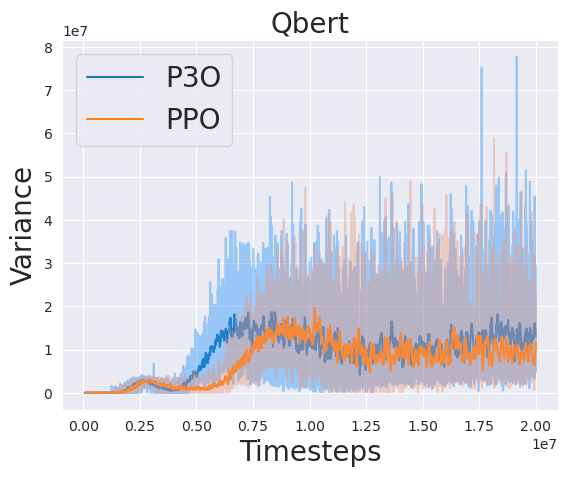

In [14]:
plt.plot(BPPO_x_axis_avg, BPPO_y_axis_BPPO_var_smoothed,label="P3O")
plt.plot(BPPO_x_axis_avg, BPPO_y_axis_BPPO_var, color="dodgerblue", alpha=0.4)
plt.plot(PPO_x_axis_avg, PPO_y_axis_PPO_var_smoothed,label="PPO")
plt.plot(PPO_x_axis_avg, PPO_y_axis_PPO_var,  color="darksalmon", alpha=0.4)
plt.xlabel('Timesteps', size=20)
plt.ylabel('Variance', size=20)
plt.legend(prop={'size':20})
plt.title("Qbert", size=20)
plt.savefig('Qbert_Variance')
plt.show()

## RiverRaid

In [15]:
BPPO_x_axis_avg, BPPO_y_axis_BPPO_avg, BPPO_y_axis_smoothed, BPPO_y_axis_BPPO_var, BPPO_y_axis_BPPO_var_smoothed = var_and_avg_plot('./riverraid_10_real/')

Riverraid-v5__beta_ppo_atari_envpool_abs__1688396568__EWMA(0.6)__20000000
Riverraid-v5__beta_ppo_atari_envpool_abs__1688407516__EWMA(0.6)__20000000
Riverraid-v5__beta_ppo_atari_envpool_abs__1688416009__EWMA(0.6)__20000000
Riverraid-v5__beta_ppo_atari_envpool_abs__1688416056__EWMA(0.6)__20000000
Riverraid-v5__beta_ppo_atari_envpool_abs__1688443511__EWMA(0.6)__20000000
Riverraid-v5__beta_ppo_atari_envpool_abs__1688443515__EWMA(0.6)__20000000
Riverraid-v5__beta_ppo_atari_envpool_abs__1688483369__EWMA(0.6)__20000000
Riverraid-v5__beta_ppo_atari_envpool_abs__1688499560__EWMA(0.6)__20000000
Riverraid-v5__beta_ppo_atari_envpool_abs__1688511925__EWMA(0.6)__20000000
Riverraid-v5__beta_ppo_atari_envpool_abs__1688511928__EWMA(0.6)__20000000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000


In [16]:
PPO_x_axis_avg, PPO_y_axis_PPO_avg, PPO_y_axis_smoothed, PPO_y_axis_PPO_var, PPO_y_axis_PPO_var_smoothed = var_and_avg_plot('./runs_riverraid_10/Training/PPO')

Riverraid-v5__ppo_atari_envpool__1680534805
Riverraid-v5__ppo_atari_envpool__1680534807
Riverraid-v5__ppo_atari_envpool__1680557341
Riverraid-v5__ppo_atari_envpool__1680557376
Riverraid-v5__ppo_atari_envpool__1680574463
Riverraid-v5__ppo_atari_envpool__1680574465
Riverraid-v5__ppo_atari_envpool__1680624902
Riverraid-v5__ppo_atari_envpool__1680624903
Riverraid-v5__ppo_atari_envpool__1680653734
Riverraid-v5__ppo_atari_envpool__1680653737
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000


### Average Return

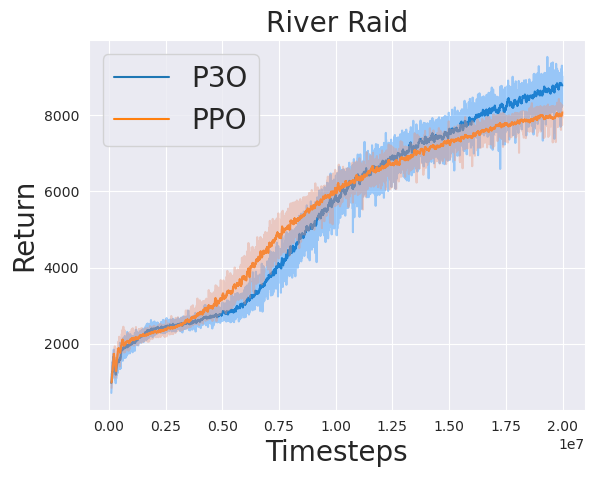

In [17]:
plt.plot(BPPO_x_axis_avg,BPPO_y_axis_smoothed, label="P3O")
plt.plot(BPPO_x_axis_avg, BPPO_y_axis_BPPO_avg, color="dodgerblue", alpha=0.4)
plt.plot(PPO_x_axis_avg, PPO_y_axis_smoothed, label="PPO")
plt.plot(PPO_x_axis_avg, PPO_y_axis_PPO_avg,  color="darksalmon", alpha=0.4)
plt.xlabel('Timesteps', size=20)
plt.ylabel('Return', size=20)
plt.legend(prop={'size':20})
plt.title("River Raid", size=20)
plt.savefig('RiverRaid_Return')
plt.show()

### Variance

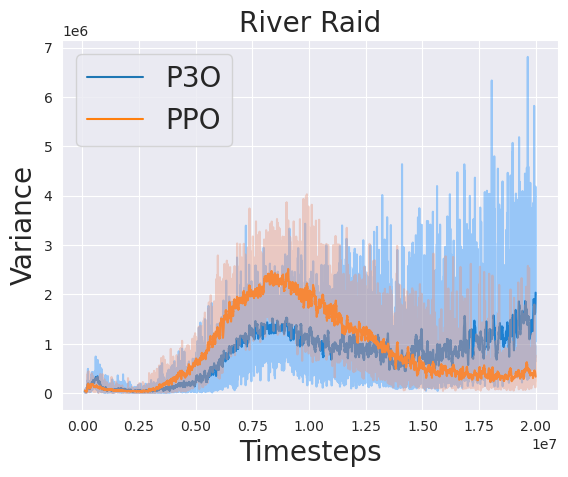

In [18]:
plt.plot(BPPO_x_axis_avg, BPPO_y_axis_BPPO_var_smoothed,label="P3O")
plt.plot(BPPO_x_axis_avg, BPPO_y_axis_BPPO_var, color="dodgerblue", alpha=0.4)
plt.plot(PPO_x_axis_avg, PPO_y_axis_PPO_var_smoothed,label="PPO")
plt.plot(PPO_x_axis_avg, PPO_y_axis_PPO_var,  color="darksalmon", alpha=0.4)
plt.xlabel('Timesteps', size=20)
plt.ylabel('Variance', size=20)
plt.legend(prop={'size':20})
plt.title("River Raid", size=20)
plt.savefig('RiverRaid_Variance')
plt.show()

In [19]:
BPPO_STD = np.std(BPPO_y_axis_BPPO_var)/np.sqrt(len(BPPO_y_axis_BPPO_var))
print(BPPO_STD)

7055.551688998556


In [20]:
PPO_STD = np.std(PPO_y_axis_PPO_var)/np.sqrt(len(PPO_y_axis_PPO_var))
print(PPO_STD)

8138.534497647859


In [21]:
#print(BPPO_y_axis_BPPO_avg)
print(np.mean(BPPO_y_axis_BPPO_avg))

4914.6545


In [22]:
#print(PPO_y_axis_PPO_avg)
print(np.mean(PPO_y_axis_PPO_avg))

5054.8053


## Seaquest

In [23]:
BPPO_x_axis_avg, BPPO_y_axis_BPPO_avg, BPPO_y_axis_smoothed, BPPO_y_axis_BPPO_var, BPPO_y_axis_BPPO_var_smoothed = var_and_avg_plot('./runs_seaquest_10/Training/BPPO')

Seaquest-v5__beta_ppo_atari_envpool__1681355135
Seaquest-v5__beta_ppo_atari_envpool__1681355147
Seaquest-v5__beta_ppo_atari_envpool__1681401196
Seaquest-v5__beta_ppo_atari_envpool__1681401201
Seaquest-v5__beta_ppo_atari_envpool__1681416172
Seaquest-v5__beta_ppo_atari_envpool__1681416176
Seaquest-v5__beta_ppo_atari_envpool__1681436708
Seaquest-v5__beta_ppo_atari_envpool__1681436711
Seaquest-v5__beta_ppo_atari_envpool__1681474506
Seaquest-v5__beta_ppo_atari_envpool__1681474508
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000


In [24]:
PPO_x_axis_avg, PPO_y_axis_PPO_avg, PPO_y_axis_smoothed, PPO_y_axis_PPO_var, PPO_y_axis_PPO_var_smoothed = var_and_avg_plot('./runs_seaquest_10/Training/PPO')

Seaquest-v5__ppo_atari_envpool__1681401207
Seaquest-v5__ppo_atari_envpool__1681416230
Seaquest-v5__ppo_atari_envpool__1681416233
Seaquest-v5__ppo_atari_envpool__1681436665
Seaquest-v5__ppo_atari_envpool__1681436667
Seaquest-v5__ppo_atari_envpool__1682884030
Seaquest-v5__ppo_atari_envpool__1682884032
Seaquest-v5__ppo_atari_envpool__1682886473
Seaquest-v5__ppo_atari_envpool__1683323573
Seaquest-v5__ppo_atari_envpool__1683339767
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000


### Average Return

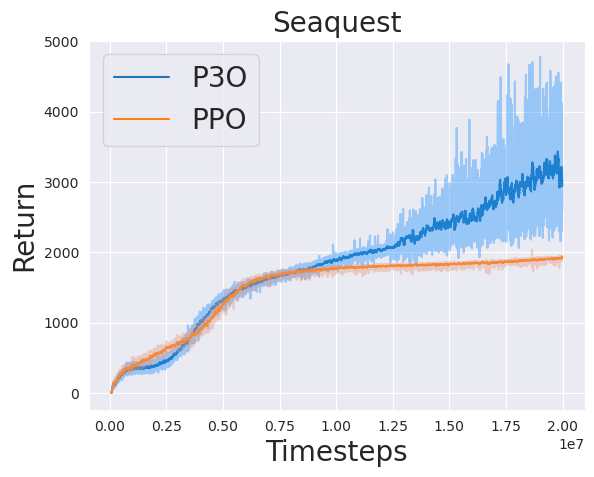

In [25]:
plt.plot(BPPO_x_axis_avg,BPPO_y_axis_smoothed, label="P3O")
plt.plot(BPPO_x_axis_avg, BPPO_y_axis_BPPO_avg, color="dodgerblue", alpha=0.4)
plt.plot(PPO_x_axis_avg, PPO_y_axis_smoothed, label="PPO")
plt.plot(PPO_x_axis_avg, PPO_y_axis_PPO_avg,  color="darksalmon", alpha=0.4)
plt.xlabel('Timesteps', size=20)
plt.ylabel('Return', size=20)
plt.legend(prop={'size':20})
plt.title("Seaquest", size=20)
plt.savefig('Seaquest_Return')
plt.show()

### Variance

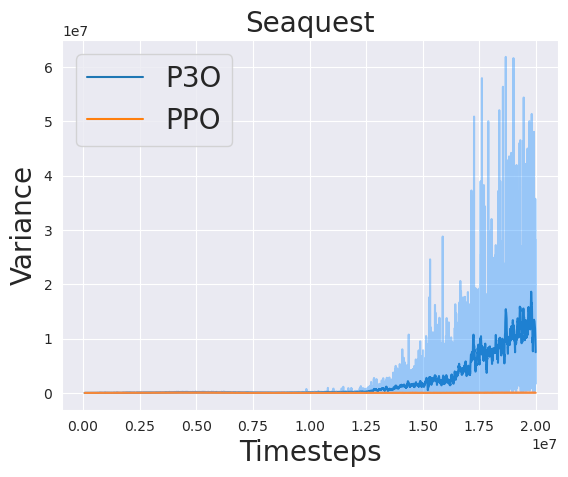

In [26]:
plt.plot(BPPO_x_axis_avg, BPPO_y_axis_BPPO_var_smoothed,label="P3O")
plt.plot(BPPO_x_axis_avg, BPPO_y_axis_BPPO_var, color="dodgerblue", alpha=0.4)
plt.plot(PPO_x_axis_avg, PPO_y_axis_PPO_var_smoothed,label="PPO")
plt.plot(PPO_x_axis_avg, PPO_y_axis_PPO_var,  color="darksalmon", alpha=0.4)
plt.xlabel('Timesteps', size=20)
plt.ylabel('Variance', size=20)
plt.legend(prop={'size':20})
plt.title("Seaquest", size=20)
plt.savefig('Seaquest_Variance')
plt.show()

## MsPacMan

In [27]:
BPPO_x_axis_avg, BPPO_y_axis_BPPO_avg, BPPO_y_axis_smoothed, BPPO_y_axis_BPPO_var, BPPO_y_axis_BPPO_var_smoothed = var_and_avg_plot('./runs_mspacman_10/Training/0.75_BPPO')

MsPacman-v5__beta_ppo_atari_envpool__1682195555__EWMA_0.75
MsPacman-v5__beta_ppo_atari_envpool__1682782224__EWMA_0.75
MsPacman-v5__beta_ppo_atari_envpool__1682782264__EWMA_0.75
MsPacman-v5__beta_ppo_atari_envpool__1682794052__EWMA_0.75
MsPacman-v5__beta_ppo_atari_envpool__1682794054__EWMA_0.75
MsPacman-v5__beta_ppo_atari_envpool__1682794092__EWMA_0.75
MsPacman-v5__beta_ppo_atari_envpool__1682794096__EWMA_0.75
MsPacman-v5__beta_ppo_atari_envpool__1682869191__EWMA_0.75
MsPacman-v5__beta_ppo_atari_envpool__1682869197__EWMA_0.75
MsPacman-v5__beta_ppo_atari_envpool__1683402782__EWMA_0.75
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000


In [28]:
PPO_x_axis_avg, PPO_y_axis_PPO_avg, PPO_y_axis_smoothed, PPO_y_axis_PPO_var, PPO_y_axis_PPO_var_smoothed = var_and_avg_plot('./runs_mspacman_10/Training/PPO')

MsPacman-v5__ppo_atari_envpool__1681678888
MsPacman-v5__ppo_atari_envpool__1681690734
MsPacman-v5__ppo_atari_envpool__1681696523
MsPacman-v5__ppo_atari_envpool__1681704653
MsPacman-v5__ppo_atari_envpool__1681743944
MsPacman-v5__ppo_atari_envpool__1681743948
MsPacman-v5__ppo_atari_envpool__1681760678
MsPacman-v5__ppo_atari_envpool__1681760680
MsPacman-v5__ppo_atari_envpool__1682782267
MsPacman-v5__ppo_atari_envpool__1682782273
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000


### Return

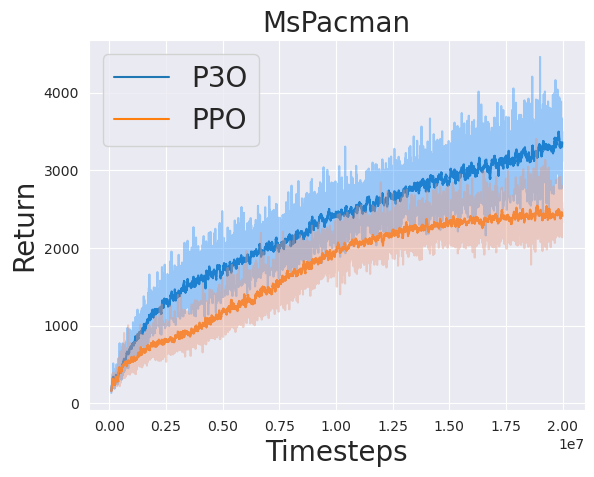

In [29]:
plt.plot(BPPO_x_axis_avg,BPPO_y_axis_smoothed, label="P3O")
plt.plot(BPPO_x_axis_avg, BPPO_y_axis_BPPO_avg, color="dodgerblue", alpha=0.4)
plt.plot(PPO_x_axis_avg, PPO_y_axis_smoothed, label="PPO")
plt.plot(PPO_x_axis_avg, PPO_y_axis_PPO_avg,  color="darksalmon", alpha=0.4)
plt.xlabel('Timesteps', size=20)
plt.ylabel('Return', size=20)
plt.legend(prop={'size':20})
plt.title("MsPacman", size=20)
plt.savefig('Mspacman_Return')
plt.show()

### Variance

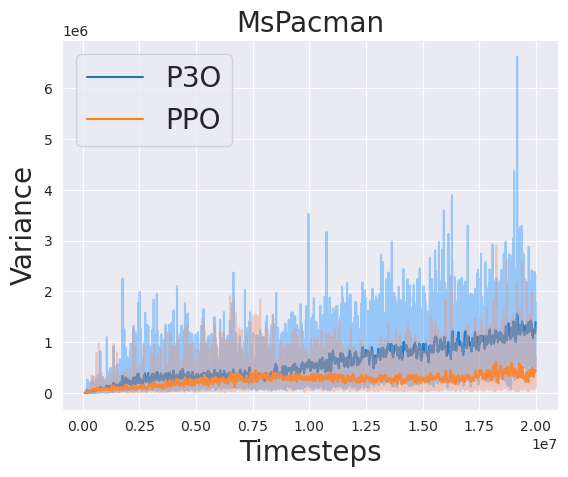

In [30]:
plt.plot(BPPO_x_axis_avg, BPPO_y_axis_BPPO_var_smoothed,label="P3O")
plt.plot(BPPO_x_axis_avg, BPPO_y_axis_BPPO_var, color="dodgerblue", alpha=0.4)
plt.plot(PPO_x_axis_avg, PPO_y_axis_PPO_var_smoothed,label="PPO")
plt.plot(PPO_x_axis_avg, PPO_y_axis_PPO_var,  color="darksalmon", alpha=0.4)
plt.xlabel('Timesteps', size=20)
plt.ylabel('Variance', size=20)
plt.legend(prop={'size':20})
plt.title("MsPacman", size=20)
plt.savefig('Mspacman_Variance')
plt.show()

## Freeway

In [31]:
BPPO_x_axis_avg, BPPO_y_axis_BPPO_avg, BPPO_y_axis_smoothed, BPPO_y_axis_BPPO_var, BPPO_y_axis_BPPO_var_smoothed = var_and_avg_plot('./runs_freeway_10/Training/BPPO')

Freeway-v5__beta_ppo_atari_envpool__1681503125
Freeway-v5__beta_ppo_atari_envpool__1681524788
Freeway-v5__beta_ppo_atari_envpool__1681524793
Freeway-v5__beta_ppo_atari_envpool__1681573292
Freeway-v5__beta_ppo_atari_envpool__1681589275
Freeway-v5__beta_ppo_atari_envpool__1681589278
Freeway-v5__beta_ppo_atari_envpool__1681606845
Freeway-v5__beta_ppo_atari_envpool__1681606848
Freeway-v5__beta_ppo_atari_envpool__1689040901
Freeway-v5__beta_ppo_atari_envpool__1689189589
9728
9728
9728
9728
9728
9728
9728
9728
9728
9728


In [32]:
PPO_x_axis_avg, PPO_y_axis_PPO_avg, PPO_y_axis_smoothed, PPO_y_axis_PPO_var, PPO_y_axis_PPO_var_smoothed = var_and_avg_plot('./runs_freeway_10/Training/PPO')

Freeway-v5__ppo_atari_envpool__1678582196
Freeway-v5__ppo_atari_envpool__1681524783
Freeway-v5__ppo_atari_envpool__1681573299
Freeway-v5__ppo_atari_envpool__1681573301
Freeway-v5__ppo_atari_envpool__1681589268
Freeway-v5__ppo_atari_envpool__1681589271
Freeway-v5__ppo_atari_envpool__1681606843
Freeway-v5__ppo_atari_envpool__1681606853
Freeway-v5__ppo_atari_envpool__1689202690__20000000
Freeway-v5__ppo_atari_envpool__1689219211__20000000
9728
9728
9728
9728
9728
9728
9728
9728
9728
9728


### Return

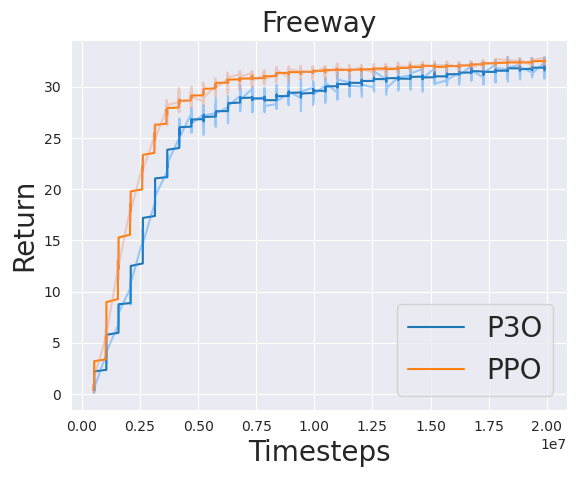

In [33]:
plt.plot(BPPO_x_axis_avg,BPPO_y_axis_smoothed, label="P3O")
plt.plot(BPPO_x_axis_avg, BPPO_y_axis_BPPO_avg, color="dodgerblue", alpha=0.4)
plt.plot(PPO_x_axis_avg, PPO_y_axis_smoothed, label="PPO")
plt.plot(PPO_x_axis_avg, PPO_y_axis_PPO_avg,  color="darksalmon", alpha=0.4)
plt.xlabel('Timesteps', size=20)
plt.ylabel('Return', size=20)
plt.legend(prop={'size':20})
plt.title("Freeway", size=20)
plt.legend(prop={'size':20})
plt.savefig('Freeway_Return')
plt.show()

### Variance

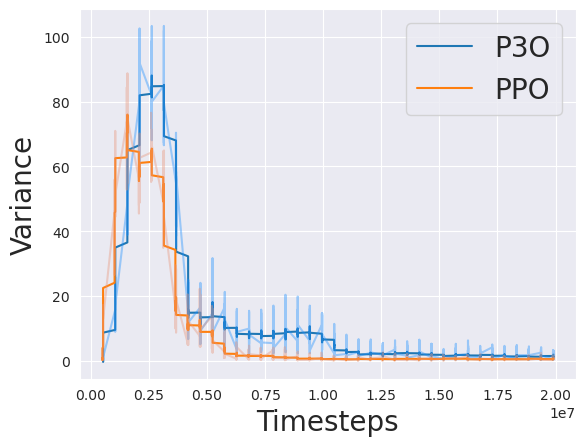

In [34]:
plt.plot(BPPO_x_axis_avg, BPPO_y_axis_BPPO_var_smoothed,label="P3O")
plt.plot(BPPO_x_axis_avg, BPPO_y_axis_BPPO_var, color="dodgerblue", alpha=0.4)
plt.plot(PPO_x_axis_avg, PPO_y_axis_PPO_var_smoothed,label="PPO")
plt.plot(PPO_x_axis_avg, PPO_y_axis_PPO_var,  color="darksalmon", alpha=0.4)
plt.xlabel('Timesteps', size=20)
plt.ylabel('Variance', size=20)
plt.legend(prop={'size':20})
plt.savefig('Freeway_Variance')
plt.show()

In [64]:
BPPO_avg, BPPO_error = test_average_10_runs('./runs_breakout_10/Testing/BPPO')
PPO_avg, PPO_error = test_average_10_runs('./runs_breakout_10/Testing/PPO')

Breakout-v5__test_bppo_atari_envpool__1681840144_EVALUATE
Breakout-v5__test_bppo_atari_envpool__1681841256_EVALUATE
Breakout-v5__test_bppo_atari_envpool__1681841301_EVALUATE
Breakout-v5__test_bppo_atari_envpool__1681841302_EVALUATE
Breakout-v5__test_bppo_atari_envpool__1681841485_EVALUATE
Breakout-v5__test_bppo_atari_envpool__1681841563_EVALUATE
Breakout-v5__test_bppo_atari_envpool__1681841638_EVALUATE
Breakout-v5__test_bppo_atari_envpool__1681841686_EVALUATE
Breakout-v5__test_bppo_atari_envpool__1681841735_EVALUATE
Breakout-v5__test_bppo_atari_envpool__1681841772_EVALUATE
Breakout-v5__test_ppo_atari_envpool__1681841482_EVALUATE
Breakout-v5__test_ppo_atari_envpool__1681841562_EVALUATE
Breakout-v5__test_ppo_atari_envpool__1681841640_EVALUATE
Breakout-v5__test_ppo_atari_envpool__1681841689_EVALUATE
Breakout-v5__test_ppo_atari_envpool__1681841737_EVALUATE
Breakout-v5__test_ppo_atari_envpool__1681841768_EVALUATE
Breakout-v5__test_ppo_atari_envpool__1681841836_EVALUATE
Breakout-v5__test_ppo

In [65]:
print(f"BPPO:{BPPO_avg} +- {BPPO_error}")
print(f"PPO:{PPO_avg} +- {PPO_error}")

BPPO:668.6 +- 60.90569759882896
PPO:363.4 +- 24.095725762051654


In [80]:
BPPO_avg, BPPO_error = test_average_10_runs('./runs_freeway_10/Testing/BPPO')
PPO_avg, PPO_error = test_average_10_runs('./runs_freeway_10/Testing/PPO')

Freeway-v5__test_bppo_atari_envpool__1681920439_EVALUATE
Freeway-v5__test_bppo_atari_envpool__1681920507_EVALUATE
Freeway-v5__test_bppo_atari_envpool__1681920575_EVALUATE
Freeway-v5__test_bppo_atari_envpool__1681920737_EVALUATE
Freeway-v5__test_bppo_atari_envpool__1681920890_EVALUATE
Freeway-v5__test_bppo_atari_envpool__1681920996_EVALUATE
Freeway-v5__test_bppo_atari_envpool__1681921088_EVALUATE
Freeway-v5__test_bppo_atari_envpool__1681921133_EVALUATE
Freeway-v5__test_bppo_atari_envpool__1683509170_EVALUATE
Freeway-v5__test_bppo_atari_envpool__1683509195_EVALUATE
Freeway-v5__test_ppo_atari_envpool__1681920371_EVALUATE
Freeway-v5__test_ppo_atari_envpool__1681920439_EVALUATE
Freeway-v5__test_ppo_atari_envpool__1681920507_EVALUATE
Freeway-v5__test_ppo_atari_envpool__1681920576_EVALUATE
Freeway-v5__test_ppo_atari_envpool__1681920740_EVALUATE
Freeway-v5__test_ppo_atari_envpool__1681920820_EVALUATE
Freeway-v5__test_ppo_atari_envpool__1681920890_EVALUATE
Freeway-v5__test_ppo_atari_envpool__16

In [81]:
print(f"BPPO:{BPPO_avg} +- {BPPO_error}")
print(f"PPO:{PPO_avg} +- {PPO_error}")

BPPO:22.9 +- 0.5735852159879994
PPO:22.8 +- 0.5059644256269407


In [77]:
BPPO_avg, BPPO_error = test_average_10_runs('./runs_seaquest_10/Testing/BPPO')

Seaquest-v5__test_bppo_atari_envpool__1681919294_EVALUATE
Seaquest-v5__test_bppo_atari_envpool__1681919369_EVALUATE
Seaquest-v5__test_bppo_atari_envpool__1681919448_EVALUATE
Seaquest-v5__test_bppo_atari_envpool__1681919516_EVALUATE
Seaquest-v5__test_bppo_atari_envpool__1681919719_EVALUATE
Seaquest-v5__test_bppo_atari_envpool__1681919811_EVALUATE
Seaquest-v5__test_bppo_atari_envpool__1681919960_EVALUATE
Seaquest-v5__test_bppo_atari_envpool__1683509025_EVALUATE
Seaquest-v5__test_bppo_atari_envpool__1683509068_EVALUATE
Seaquest-v5__test_bppo_atari_envpool__1683509093_EVALUATE


In [78]:
PPO_avg, PPO_error = test_average_10_runs('./runs_seaquest_10/Testing/PPO')

Seaquest-v5__test_ppo_atari_envpool__1681919296_EVALUATE
Seaquest-v5__test_ppo_atari_envpool__1681919375_EVALUATE
Seaquest-v5__test_ppo_atari_envpool__1681919450_EVALUATE
Seaquest-v5__test_ppo_atari_envpool__1681919518_EVALUATE
Seaquest-v5__test_ppo_atari_envpool__1681919603_EVALUATE
Seaquest-v5__test_ppo_atari_envpool__1681919722_EVALUATE
Seaquest-v5__test_ppo_atari_envpool__1681919812_EVALUATE
Seaquest-v5__test_ppo_atari_envpool__1681919889_EVALUATE
Seaquest-v5__test_ppo_atari_envpool__1681919961_EVALUATE
Seaquest-v5__test_ppo_atari_envpool__1681920036_EVALUATE


In [79]:
print(f"BPPO:{BPPO_avg} +- {BPPO_error}")
print(f"PPO:{PPO_avg} +- {PPO_error}")

BPPO:2576.0 +- 11.59310139695155
PPO:1806.0 +- 6.356099432828281


In [12]:
BPPO_avg, BPPO_error = test_average_10_runs('./RiverRaid/riverraid_10_test_real')

Riverraid-v5__test_bppo_atari_envpool__1688842492_EVALUATE
Riverraid-v5__test_bppo_atari_envpool__1688842528_EVALUATE
Riverraid-v5__test_bppo_atari_envpool__1688842570_EVALUATE
Riverraid-v5__test_bppo_atari_envpool__1688842914_EVALUATE
Riverraid-v5__test_bppo_atari_envpool__1688843004_EVALUATE
Riverraid-v5__test_bppo_atari_envpool__1688843052_EVALUATE
Riverraid-v5__test_bppo_atari_envpool__1688843106_EVALUATE
Riverraid-v5__test_bppo_atari_envpool__1688843196_EVALUATE
Riverraid-v5__test_bppo_atari_envpool__1688843316_EVALUATE
Riverraid-v5__test_bppo_atari_envpool__1688843590_EVALUATE


In [14]:
PPO_avg, PPO_error = test_average_10_runs('./runs_riverraid_10/Testing/PPO')

Riverraid-v5__test_ppo_atari_envpool__1681953448_EVALUATE
Riverraid-v5__test_ppo_atari_envpool__1681953480_EVALUATE
Riverraid-v5__test_ppo_atari_envpool__1681953507_EVALUATE
Riverraid-v5__test_ppo_atari_envpool__1681953625_EVALUATE
Riverraid-v5__test_ppo_atari_envpool__1681954380_EVALUATE
Riverraid-v5__test_ppo_atari_envpool__1681954422_EVALUATE
Riverraid-v5__test_ppo_atari_envpool__1681954552_EVALUATE
Riverraid-v5__test_ppo_atari_envpool__1681955221_EVALUATE
Riverraid-v5__test_ppo_atari_envpool__1681955317_EVALUATE
Riverraid-v5__test_ppo_atari_envpool__1683321393_EVALUATE


In [15]:
print(f"BPPO:{BPPO_avg} +- {BPPO_error}")
print(f"PPO:{PPO_avg} +- {PPO_error}")

BPPO:8898.0 +- 88.34930673185839
PPO:8068.0 +- 107.18022205612377


In [74]:
BPPO_avg, BPPO_error = test_average_10_runs('./runs_qbert_10/Testing/BPPO')

Qbert-v5__test_bppo_atari_envpool__1681863352_EVALUATE
Qbert-v5__test_bppo_atari_envpool__1681863381_EVALUATE
Qbert-v5__test_bppo_atari_envpool__1681863420_EVALUATE
Qbert-v5__test_bppo_atari_envpool__1681863461_EVALUATE
Qbert-v5__test_bppo_atari_envpool__1681863505_EVALUATE
Qbert-v5__test_bppo_atari_envpool__1681863567_EVALUATE
Qbert-v5__test_bppo_atari_envpool__1681863604_EVALUATE
Qbert-v5__test_bppo_atari_envpool__1681863648_EVALUATE
Qbert-v5__test_bppo_atari_envpool__1681863729_EVALUATE
Qbert-v5__test_bppo_atari_envpool__1681863773_EVALUATE


In [75]:
PPO_avg, PPO_error = test_average_10_runs('./runs_qbert_10/Testing/PPO')

Qbert-v5__test_ppo_atari_envpool__1681863289_EVALUATE
Qbert-v5__test_ppo_atari_envpool__1681863356_EVALUATE
Qbert-v5__test_ppo_atari_envpool__1681863383_EVALUATE
Qbert-v5__test_ppo_atari_envpool__1681863421_EVALUATE
Qbert-v5__test_ppo_atari_envpool__1681863462_EVALUATE
Qbert-v5__test_ppo_atari_envpool__1681863506_EVALUATE
Qbert-v5__test_ppo_atari_envpool__1681863569_EVALUATE
Qbert-v5__test_ppo_atari_envpool__1681863607_EVALUATE
Qbert-v5__test_ppo_atari_envpool__1681863650_EVALUATE
Qbert-v5__test_ppo_atari_envpool__1681863731_EVALUATE


In [76]:
print(f"BPPO:{BPPO_avg} +- {BPPO_error}")
print(f"PPO:{PPO_avg} +- {PPO_error}")

BPPO:18462.5 +- 770.4239904104752
PPO:16855.0 +- 751.7546142192942


In [79]:
BPPO_avg, BPPO_error = test_average_10_runs('./runs_mspacman_10/Testing/BPPO')
PPO_avg, PPO_error = test_average_10_runs('./runs_mspacman_10/Testing/PPO')

MsPacman-v5__test_bppo_atari_envpool__1682904945_EVALUATE
MsPacman-v5__test_bppo_atari_envpool__1682904972_EVALUATE
MsPacman-v5__test_bppo_atari_envpool__1682904995_EVALUATE
MsPacman-v5__test_bppo_atari_envpool__1682905029_EVALUATE
MsPacman-v5__test_bppo_atari_envpool__1682905053_EVALUATE
MsPacman-v5__test_bppo_atari_envpool__1682905162_EVALUATE
MsPacman-v5__test_bppo_atari_envpool__1682905228_EVALUATE
MsPacman-v5__test_bppo_atari_envpool__1682905256_EVALUATE
MsPacman-v5__test_bppo_atari_envpool__1682905284_EVALUATE
MsPacman-v5__test_bppo_atari_envpool__1682905313_EVALUATE
MsPacman-v5__test_ppo_atari_envpool__1681950785_EVALUATE
MsPacman-v5__test_ppo_atari_envpool__1681950899_EVALUATE
MsPacman-v5__test_ppo_atari_envpool__1681950926_EVALUATE
MsPacman-v5__test_ppo_atari_envpool__1681950984_EVALUATE
MsPacman-v5__test_ppo_atari_envpool__1681951032_EVALUATE
MsPacman-v5__test_ppo_atari_envpool__1681951085_EVALUATE
MsPacman-v5__test_ppo_atari_envpool__1681951115_EVALUATE
MsPacman-v5__test_ppo

In [80]:
print(f"BPPO:{BPPO_avg} +- {BPPO_error}")
print(f"PPO:{PPO_avg} +- {PPO_error}")

BPPO:5015.0 +- 156.94107174350503
BPPO:1975.0 +- 77.12651943397938


## Lunar Lander

In [12]:
BPPO_x_axis_avg, BPPO_y_axis_BPPO_avg, BPPO_y_axis_BPPO_var = var_and_avg_plot_lander('./LunarLander/beta_ppo/')

LunarLander-v2__beta_ppo__1__1686782133
LunarLander-v2__beta_ppo__1__1686791048
LunarLander-v2__beta_ppo__1__1686791050
LunarLander-v2__beta_ppo__1__1686797786
LunarLander-v2__beta_ppo__1__1686797798
LunarLander-v2__beta_ppo__1__1686802469
LunarLander-v2__beta_ppo__1__1686802472
LunarLander-v2__beta_ppo__1__1686806588
LunarLander-v2__beta_ppo__1__1686806861
LunarLander-v2__beta_ppo__1__1686843508
LunarLander-v2__beta_ppo__1__1686843510
LunarLander-v2__beta_ppo__1__1686854825
LunarLander-v2__beta_ppo__1__1686854827
[list([-114.2297592163086, -82.92071533203125, -209.64617919921875, -149.48153686523438, -272.4576721191406, -183.6634979248047, -76.36953735351562, 11.081336975097656, -175.6957244873047, -94.1237564086914, -127.45045471191406, -189.1894073486328, -90.08325958251953, -116.14295959472656, -145.95175170898438, -86.37033081054688, -90.35990905761719, -210.76925659179688, -341.17584228515625, -251.46066284179688, -175.67486572265625, -337.24017333984375, -234.69076538085938, -33

/tmp/ipykernel_344/808067193.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_axis_BPPO = np.array([[x[0] for x in y['charts/episodic_return'] ]for y in BPPO_10])
/tmp/ipykernel_344/808067193.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_axis_BPPO = np.array([[x[1] for x in y['charts/episodic_return'] ]for y in BPPO_10])


In [8]:
lprint(BPPO_y_axis_BPPO_var)

NameError: name 'lprint' is not defined

In [9]:
PPO_x_axis_avg, PPO_y_axis_PPO_avg, PPO_y_axis_PPO_var = var_and_avg_plot_lander('./LunarLander/ppo/')

LunarLander-v2__ppo__1686690915
LunarLander-v2__ppo__1686690966
LunarLander-v2__ppo__1686713050
LunarLander-v2__ppo__1686713052
LunarLander-v2__ppo__1686716977
LunarLander-v2__ppo__1686716980
LunarLander-v2__ppo__1686720840
LunarLander-v2__ppo__1686720842
LunarLander-v2__ppo__1686755392
LunarLander-v2__ppo__1686767315
LunarLander-v2__ppo__1686767317
LunarLander-v2__ppo__1686773068
LunarLander-v2__ppo__1686773071
6607
7113
7271
7035
6981
7132
6643
6848
10000
6569
6577
6366
6862


/tmp/ipykernel_344/3268687552.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_axis_BPPO = np.array([[x[0] for x in y['charts/episodic_return'] ]for y in BPPO_10])
/tmp/ipykernel_344/3268687552.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_axis_BPPO = np.array([[x[1] for x in y['charts/episodic_return'] ]for y in BPPO_10])


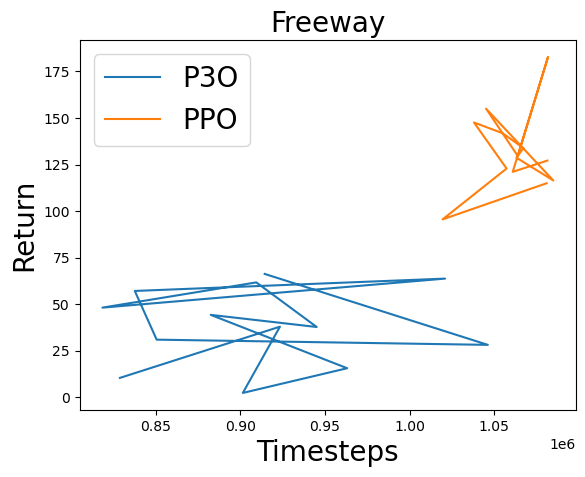

In [10]:
plt.plot(BPPO_x_axis_avg, BPPO_y_axis_BPPO_avg, label="P3O")
plt.plot(PPO_x_axis_avg, PPO_y_axis_PPO_avg, label="PPO")
plt.xlabel('Timesteps', size=20)
plt.ylabel('Return', size=20)
plt.title("Freeway", size=20)
plt.legend(prop={'size':20})
plt.savefig('Freeway_Return')
plt.show()